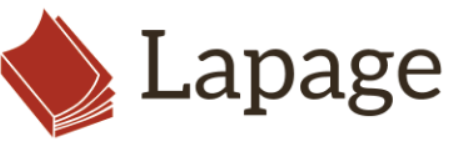

### Première Partie - Importation des librairies et préparation des dataframes

### I. Importation des librairies

In [1]:
# Importons les librairies dont nous auront besoin
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

### II. Récupération des fichiers

#### II.1.  Récupération des fichiers

#### II.1.1. Customers

In [2]:
# Récupérons notre fichier  dans une variable
customers = pd.read_csv('customers_clean.csv')

#### II.1.2. Products

In [3]:
# Récupérons notre fichier dans une variable
products = pd.read_csv('products_clean.csv')

#### II.1.3. Transactions

In [4]:
# Récupérons notre fichier  dans une variable
transactions = pd.read_csv('transactions_clean.csv')

#### II.2.  Jointure

In [5]:
# les clés primaires : 'client_id' du dataframe customers, 'id_prod' du dataframe products, 'session_id' de transactions
# Fusionnons le dataframe transactions et le dataframe products sur la clé unique 'id_prod'
# Fusionnons ensuite le dataframe transac_prod sur la clé unique 'client_id' du dataframe customers
transac_prod = pd.merge(transactions,products, how='left', on='id_prod')
transac_prod_cust = pd.merge(transac_prod,customers, how='left', on= 'client_id')
transac_prod_cust

,id_prod,date,session_id,client_id,price,categ,sex,birth,age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986,36
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1.0,m,1988,34
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,7.99,0.0,f,1968,54
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0,m,2000,22
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0.0,m,1980,42
...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,12.99,0.0,f,1951,71
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,10.99,1.0,f,1977,45
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,12.99,0.0,f,1988,34
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,4.98,0.0,m,1986,36


- On effectue la jointure de transactions successivement sur  produits et clients, en ne conservant que les clés de transactions (les clients inactifs et les produits invendus sont écartés).
- Nous avons uniquement les clients acheteurs

In [6]:
# Renommons les colonnes en y association la première lettre de chaque dataframe
transac_prod_cust.rename(columns={'client_id':'c_client_id','sex':'c_sex','birth':'c_birth',
                                        'id_prod':'p_id_prod','price':'p_price','categ':'p_categ',
                                        'date':'t_date','session_id':'t_session_id','age':'c_age'},inplace=True)
transac_prod_cust.columns

Index(['p_id_prod', 't_date', 't_session_id', 'c_client_id', 'p_price',
       'p_categ', 'c_sex', 'c_birth', 'c_age'],
      dtype='object')

In [7]:
transac_prod_cust.dtypes

p_id_prod        object
t_date           object
t_session_id     object
c_client_id      object
p_price         float64
p_categ         float64
c_sex            object
c_birth           int64
c_age             int64
dtype: object

In [8]:
# Modifions le type des colonnes sauf 'date'
transac_prod_cust['p_id_prod'] = transac_prod_cust['p_id_prod'].astype('string')
transac_prod_cust['c_client_id'] = transac_prod_cust['c_client_id'].astype('string')
transac_prod_cust['c_sex'] = transac_prod_cust['c_sex'].astype('string')
transac_prod_cust['t_session_id']= transac_prod_cust['t_session_id'].astype('string')
transac_prod_cust.dtypes

p_id_prod        string
t_date           object
t_session_id     string
c_client_id      string
p_price         float64
p_categ         float64
c_sex            string
c_birth           int64
c_age             int64
dtype: object

#### II.2.1 Opérations sur les dates

In [9]:
# Créons une colonne de date année-mois-jour
transac_prod_cust['t_date_day']= transac_prod_cust['t_date'].astype("datetime64").dt.date
transac_prod_cust['t_date_day']

0         2022-05-20
1         2022-02-02
2         2022-06-18
3         2021-06-24
4         2023-01-11
             ...    
679327    2022-01-15
679328    2022-03-19
679329    2022-12-20
679330    2021-07-16
679331    2022-09-28
Name: t_date_day, Length: 679332, dtype: object

In [10]:
# Convertissons les dates en mois
transac_prod_cust['annee_mois'] = transac_prod_cust['t_date'].astype("datetime64").dt.to_period('M')
transac_prod_cust['annee_mois']

0         2022-05
1         2022-02
2         2022-06
3         2021-06
4         2023-01
           ...   
679327    2022-01
679328    2022-03
679329    2022-12
679330    2021-07
679331    2022-09
Name: annee_mois, Length: 679332, dtype: period[M]

In [11]:
# Modifions le type de la colonne 'date'
transac_prod_cust['t_date'] = pd.to_datetime(transac_prod_cust['t_date'], format='%Y-%m-%d')
transac_prod_cust['t_date']

0        2022-05-20 13:21:29.043970
1        2022-02-02 07:55:19.149409
2        2022-06-18 15:44:33.155329
3        2021-06-24 04:19:29.835891
4        2023-01-11 08:22:08.194479
                    ...            
679327   2022-01-15 13:05:06.246925
679328   2022-03-19 16:03:23.429229
679329   2022-12-20 04:33:37.584749
679330   2021-07-16 20:36:35.350579
679331   2022-09-28 01:12:01.973763
Name: t_date, Length: 679332, dtype: datetime64[ns]

In [12]:
# Modifions l'index dans un premier temps pour mieux localiser notre colonne 't_date'
transac_prod_cust = transac_prod_cust.set_index('t_date')
transac_prod_cust

,p_id_prod,t_session_id,c_client_id,p_price,p_categ,c_sex,c_birth,c_age,t_date_day,annee_mois
t_date,,,,,,,,,,
2022-05-20 13:21:29.043970,0_1518,s_211425,c_103,4.18,0.0,f,1986,36,2022-05-20,2022-05
2022-02-02 07:55:19.149409,1_251,s_158752,c_8534,15.99,1.0,m,1988,34,2022-02-02,2022-02
2022-06-18 15:44:33.155329,0_1277,s_225667,c_6714,7.99,0.0,f,1968,54,2022-06-18,2022-06
2021-06-24 04:19:29.835891,2_209,s_52962,c_6941,69.99,2.0,m,2000,22,2021-06-24,2021-06
2023-01-11 08:22:08.194479,0_1509,s_325227,c_4232,4.99,0.0,m,1980,42,2023-01-11,2023-01
...,...,...,...,...,...,...,...,...,...,...
2022-01-15 13:05:06.246925,0_1551,s_150195,c_8489,12.99,0.0,f,1951,71,2022-01-15,2022-01
2022-03-19 16:03:23.429229,1_639,s_181434,c_4370,10.99,1.0,f,1977,45,2022-03-19,2022-03
2022-12-20 04:33:37.584749,0_1425,s_314704,c_304,12.99,0.0,f,1988,34,2022-12-20,2022-12


In [13]:
# Créons la colonne 'year'
transac_prod_cust['year'] = transac_prod_cust.index.year
transac_prod_cust.head(2)

,p_id_prod,t_session_id,c_client_id,p_price,p_categ,c_sex,c_birth,c_age,t_date_day,annee_mois,year
t_date,,,,,,,,,,,
2022-05-20 13:21:29.043970,0_1518,s_211425,c_103,4.18,0.0,f,1986,36,2022-05-20,2022-05,2022
2022-02-02 07:55:19.149409,1_251,s_158752,c_8534,15.99,1.0,m,1988,34,2022-02-02,2022-02,2022


In [14]:
# Créons la colonne 'month' et la colonne'day_name' 
transac_prod_cust['month'] = transac_prod_cust.index.month
transac_prod_cust['day_name'] = transac_prod_cust.index.day_name()
transac_prod_cust.head(3)

,p_id_prod,t_session_id,c_client_id,p_price,p_categ,c_sex,c_birth,c_age,t_date_day,annee_mois,year,month,day_name
t_date,,,,,,,,,,,,,
2022-05-20 13:21:29.043970,0_1518,s_211425,c_103,4.18,0.0,f,1986,36,2022-05-20,2022-05,2022,5,Friday
2022-02-02 07:55:19.149409,1_251,s_158752,c_8534,15.99,1.0,m,1988,34,2022-02-02,2022-02,2022,2,Wednesday
2022-06-18 15:44:33.155329,0_1277,s_225667,c_6714,7.99,0.0,f,1968,54,2022-06-18,2022-06,2022,6,Saturday


In [15]:
# Re vérifions les types de données
transac_prod_cust.dtypes

p_id_prod          string
t_session_id       string
c_client_id        string
p_price           float64
p_categ           float64
c_sex              string
c_birth             int64
c_age               int64
t_date_day         object
annee_mois      period[M]
year                int64
month               int64
day_name           object
dtype: object

In [16]:
# cherchons les valeurs manquantes
transac_prod_cust.isnull().sum()

p_id_prod         0
t_session_id      0
c_client_id       0
p_price         221
p_categ         221
c_sex             0
c_birth           0
c_age             0
t_date_day        0
annee_mois        0
year              0
month             0
day_name          0
dtype: int64

In [17]:
# Affichons les valeurs nulles des prix et des categories
transac_prod_cust[transac_prod_cust['p_price'].isnull()]

,p_id_prod,t_session_id,c_client_id,p_price,p_categ,c_sex,c_birth,c_age,t_date_day,annee_mois,year,month,day_name
t_date,,,,,,,,,,,,,
2022-09-23 07:22:38.636773,0_2245,s_272266,c_4746,NaN,NaN,m,1940,82,2022-09-23,2022-09,2022,9,Friday
2022-07-23 09:24:14.133889,0_2245,s_242482,c_6713,NaN,NaN,f,1963,59,2022-07-23,2022-07,2022,7,Saturday
2022-12-03 03:26:35.696673,0_2245,s_306338,c_5108,NaN,NaN,m,1978,44,2022-12-03,2022-12,2022,12,Saturday
2021-08-16 11:33:25.481411,0_2245,s_76493,c_1391,NaN,NaN,m,1991,31,2021-08-16,2021-08,2021,8,Monday
2022-07-16 05:53:01.627491,0_2245,s_239078,c_7954,NaN,NaN,m,1973,49,2022-07-16,2022-07,2022,7,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-25 09:06:03.504061,0_2245,s_80395,c_131,NaN,NaN,m,1981,41,2021-08-25,2021-08,2021,8,Wednesday
2022-03-06 19:59:19.462288,0_2245,s_175311,c_4167,NaN,NaN,f,1979,43,2022-03-06,2022-03,2022,3,Sunday
2022-05-16 11:35:20.319501,0_2245,s_209381,c_4453,NaN,NaN,m,1981,41,2022-05-16,2022-05,2022,5,Monday


#### II.2.2 Imputatiion

In [18]:
# Affichons Les produits 0_2245
transac_prod_cust[transac_prod_cust['p_id_prod']== '0_2245']

,p_id_prod,t_session_id,c_client_id,p_price,p_categ,c_sex,c_birth,c_age,t_date_day,annee_mois,year,month,day_name
t_date,,,,,,,,,,,,,
2022-09-23 07:22:38.636773,0_2245,s_272266,c_4746,NaN,NaN,m,1940,82,2022-09-23,2022-09,2022,9,Friday
2022-07-23 09:24:14.133889,0_2245,s_242482,c_6713,NaN,NaN,f,1963,59,2022-07-23,2022-07,2022,7,Saturday
2022-12-03 03:26:35.696673,0_2245,s_306338,c_5108,NaN,NaN,m,1978,44,2022-12-03,2022-12,2022,12,Saturday
2021-08-16 11:33:25.481411,0_2245,s_76493,c_1391,NaN,NaN,m,1991,31,2021-08-16,2021-08,2021,8,Monday
2022-07-16 05:53:01.627491,0_2245,s_239078,c_7954,NaN,NaN,m,1973,49,2022-07-16,2022-07,2022,7,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-25 09:06:03.504061,0_2245,s_80395,c_131,NaN,NaN,m,1981,41,2021-08-25,2021-08,2021,8,Wednesday
2022-03-06 19:59:19.462288,0_2245,s_175311,c_4167,NaN,NaN,f,1979,43,2022-03-06,2022-03,2022,3,Sunday
2022-05-16 11:35:20.319501,0_2245,s_209381,c_4453,NaN,NaN,m,1981,41,2022-05-16,2022-05,2022,5,Monday


- Les prix et les catégories (221 données) du dataframe fusionné sont nuls
- Le produit 0_2245 est dans 'transactions' mais n'est pas dans 'products'

<AxesSubplot:>

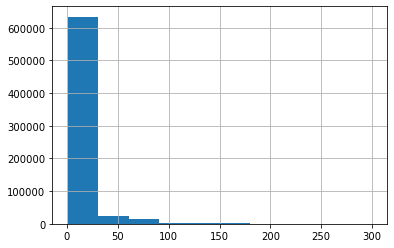

In [19]:
# Representons les prix sur un histogramme pour voir l'étalement
transac_prod_cust['p_price'].hist()

- On observe une forte concentration des prix entre 0 € et 45 €
- On observe un étalement de la distribution vers la droite
- Skewness positif qui indique une queue de distribution étalée vers la droite.
- Après imputation on va s'assurer que la distribution ne change trop

In [20]:
# indicateurs statistiques
transac_prod_cust['p_price'].describe()

count    679111.000000
mean         17.454773
std          18.328998
min           0.620000
25%           8.870000
50%          13.990000
75%          18.990000
max         300.000000
Name: p_price, dtype: float64

#### II.2.2.1 Imputatiion par la moyenne

In [21]:
# Copions le dataframe afin de tester l'imputation par la moyenne dans un premier temps
transac_prod_cust2 = transac_prod_cust.copy()

<AxesSubplot:>

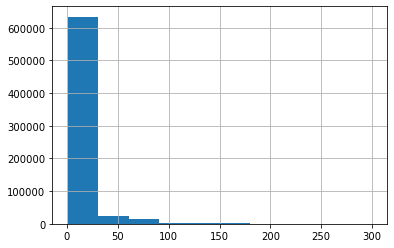

In [22]:
# Remplaçons les valeurs manques par la moyenne
transac_prod_cust2['p_price'] = transac_prod_cust2.p_price.fillna(transac_prod_cust2.p_price.mean())
transac_prod_cust2['p_price'].hist()

- La distribution reste la même après l'imputation par la moyenne 
- Skewness positif 

In [23]:
# indicateurs statistiques
transac_prod_cust2['p_price'].describe()

count    679332.000000
mean         17.454773
std          18.326016
min           0.620000
25%           8.870000
50%          13.990000
75%          18.990000
max         300.000000
Name: p_price, dtype: float64

#### II.2.2.1 Imputatiion par la médiane

In [24]:
# Copions le dataframe afin de tester l'imputation par la médiane dans un deuxième temps
transac_prod_cust3 = transac_prod_cust.copy()

<AxesSubplot:>

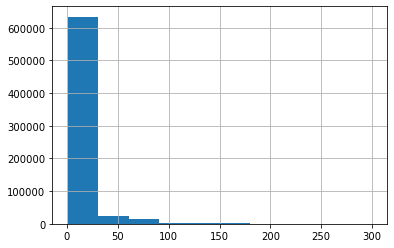

In [25]:
# Remplaçons les valeurs manques par la médiane
transac_prod_cust3['p_price']  = transac_prod_cust3.p_price.fillna(transac_prod_cust3.p_price.median())
transac_prod_cust3['p_price'].hist()

- Skewness positif 
- La distribution reste la même après l'imputation par la médiane 
- la moyenne est très sensible aux valeurs extrêmes, alors que la médiane ne l’est pas. Nous imputerons par la médiane

In [26]:
# indicateurs statistiques
transac_prod_cust3['p_price'].describe()

count    679332.000000
mean         17.453646
std          18.326122
min           0.620000
25%           8.870000
50%          13.990000
75%          18.990000
max         300.000000
Name: p_price, dtype: float64

In [27]:
# Affichons l'imputation par lé médiane
transac_prod_cust3[transac_prod_cust3.p_id_prod=='0_2245']

,p_id_prod,t_session_id,c_client_id,p_price,p_categ,c_sex,c_birth,c_age,t_date_day,annee_mois,year,month,day_name
t_date,,,,,,,,,,,,,
2022-09-23 07:22:38.636773,0_2245,s_272266,c_4746,13.99,NaN,m,1940,82,2022-09-23,2022-09,2022,9,Friday
2022-07-23 09:24:14.133889,0_2245,s_242482,c_6713,13.99,NaN,f,1963,59,2022-07-23,2022-07,2022,7,Saturday
2022-12-03 03:26:35.696673,0_2245,s_306338,c_5108,13.99,NaN,m,1978,44,2022-12-03,2022-12,2022,12,Saturday
2021-08-16 11:33:25.481411,0_2245,s_76493,c_1391,13.99,NaN,m,1991,31,2021-08-16,2021-08,2021,8,Monday
2022-07-16 05:53:01.627491,0_2245,s_239078,c_7954,13.99,NaN,m,1973,49,2022-07-16,2022-07,2022,7,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-25 09:06:03.504061,0_2245,s_80395,c_131,13.99,NaN,m,1981,41,2021-08-25,2021-08,2021,8,Wednesday
2022-03-06 19:59:19.462288,0_2245,s_175311,c_4167,13.99,NaN,f,1979,43,2022-03-06,2022-03,2022,3,Sunday
2022-05-16 11:35:20.319501,0_2245,s_209381,c_4453,13.99,NaN,m,1981,41,2022-05-16,2022-05,2022,5,Monday


In [28]:
# Filtrons les produits 
transac_prod_cust3[transac_prod_cust3.p_id_prod=='0_2245']

,p_id_prod,t_session_id,c_client_id,p_price,p_categ,c_sex,c_birth,c_age,t_date_day,annee_mois,year,month,day_name
t_date,,,,,,,,,,,,,
2022-09-23 07:22:38.636773,0_2245,s_272266,c_4746,13.99,NaN,m,1940,82,2022-09-23,2022-09,2022,9,Friday
2022-07-23 09:24:14.133889,0_2245,s_242482,c_6713,13.99,NaN,f,1963,59,2022-07-23,2022-07,2022,7,Saturday
2022-12-03 03:26:35.696673,0_2245,s_306338,c_5108,13.99,NaN,m,1978,44,2022-12-03,2022-12,2022,12,Saturday
2021-08-16 11:33:25.481411,0_2245,s_76493,c_1391,13.99,NaN,m,1991,31,2021-08-16,2021-08,2021,8,Monday
2022-07-16 05:53:01.627491,0_2245,s_239078,c_7954,13.99,NaN,m,1973,49,2022-07-16,2022-07,2022,7,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-25 09:06:03.504061,0_2245,s_80395,c_131,13.99,NaN,m,1981,41,2021-08-25,2021-08,2021,8,Wednesday
2022-03-06 19:59:19.462288,0_2245,s_175311,c_4167,13.99,NaN,f,1979,43,2022-03-06,2022-03,2022,3,Sunday
2022-05-16 11:35:20.319501,0_2245,s_209381,c_4453,13.99,NaN,m,1981,41,2022-05-16,2022-05,2022,5,Monday


In [29]:
# Remplaçons les valeurs nulles de la catégorie par 0
transac_prod_cust2['p_categ'] = transac_prod_cust2['p_categ'].fillna(0)

In [30]:
# Remplaçons les valeurs manquantes de la colonne 'catégorie' par 0
transac_prod_cust3['p_categ'] = transac_prod_cust3['p_categ'].fillna(0)

In [31]:
# Affichons 
transac_prod_cust3[transac_prod_cust3.p_id_prod=='0_2245']

,p_id_prod,t_session_id,c_client_id,p_price,p_categ,c_sex,c_birth,c_age,t_date_day,annee_mois,year,month,day_name
t_date,,,,,,,,,,,,,
2022-09-23 07:22:38.636773,0_2245,s_272266,c_4746,13.99,0.0,m,1940,82,2022-09-23,2022-09,2022,9,Friday
2022-07-23 09:24:14.133889,0_2245,s_242482,c_6713,13.99,0.0,f,1963,59,2022-07-23,2022-07,2022,7,Saturday
2022-12-03 03:26:35.696673,0_2245,s_306338,c_5108,13.99,0.0,m,1978,44,2022-12-03,2022-12,2022,12,Saturday
2021-08-16 11:33:25.481411,0_2245,s_76493,c_1391,13.99,0.0,m,1991,31,2021-08-16,2021-08,2021,8,Monday
2022-07-16 05:53:01.627491,0_2245,s_239078,c_7954,13.99,0.0,m,1973,49,2022-07-16,2022-07,2022,7,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-25 09:06:03.504061,0_2245,s_80395,c_131,13.99,0.0,m,1981,41,2021-08-25,2021-08,2021,8,Wednesday
2022-03-06 19:59:19.462288,0_2245,s_175311,c_4167,13.99,0.0,f,1979,43,2022-03-06,2022-03,2022,3,Sunday
2022-05-16 11:35:20.319501,0_2245,s_209381,c_4453,13.99,0.0,m,1981,41,2022-05-16,2022-05,2022,5,Monday


### Deuxième Partie - Demandes d'Antoine

### I. Indicateurs et graphiques autour du chiffre d'affaires

#### I.1.1 Calcul du chiffre d'affaires

In [32]:
# Déterminons le CA de la période
CA = transac_prod_cust3['p_price'].sum()
print(f'Le Chiffre daffaires est égal à {CA:.0f} €')

Le Chiffre daffaires est égal à 11856820 €


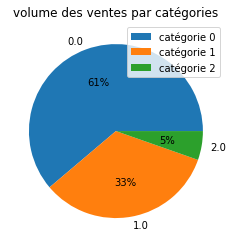

In [33]:
# Visualisons le volume des ventes à l'aide d'un diagrame en camembert
freqs = transac_prod_cust3['p_categ'].value_counts()
plt.pie(freqs,autopct='%1.0f%%',  labels=freqs.index)
plt.legend(['catégorie 0', 'catégorie 1', 'catégorie 2'])
plt.title('volume des ventes par catégories')
plt.show()

- La catégorie 0 représente 60% des ventes, la catégorie 2 seulement 5%.
Malgré tout, les prix des catégories 2 et 1 entraînent une inégalité des chiffres d'affaires annuels par produit
- Les livres aux plus hauts chiffre d'affaires appartiennent tous aux catégories 1 et 2

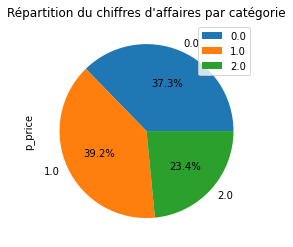

In [34]:
# Visualisons la contribution au chiffre d'affaires à l'aide d'un diagrame en camembert
data=transac_prod_cust3.pivot_table(index='p_categ', aggfunc={'p_price': np.sum}).plot(
    kind='pie', y='p_price',
    legend=True,
    autopct='%1.1f%%'
)
plt.title('Répartition du chiffres d\'affaires par catégorie')
plt.show()

 Toute les catégories sont importantes.
**La catégorie 2 n'est pas a négliger**, même si elle représente 5% du volume des ventes, elle contribue au CA de 23%

#### I.1.2 Séries temporelles

- Une série temporelle, ou série chronologique, est une suite de valeurs numériques représentant l'évolution d'une quantité spécifique au cours du temps.
- Les séries chronologiques sont très importantes. Presque toutes les variables sont collectées dans le temps.
- Il est intéressant de voir l'évolution d'une variable dans le temps, pas la valeur spécifique à un moment donné.

In [35]:
# Filtrons notre dataframe sur la 't_date_day et 'p_price'
transac_prod_cust_short = transac_prod_cust3[['t_date_day','p_price','p_categ']]

In [36]:
# Appliquons la fonction 'pivot_table' pour agréger les prix sur la période correspondante
transac_prod_cust_jour_pivot = pd.pivot_table(transac_prod_cust_short,  index=['t_date_day'], columns=['p_categ'],  values=['p_price'], aggfunc='sum')

In [37]:
# Affichons le résultat retourné
transac_prod_cust_jour_pivot

p_price                  
p_categ         0.0      1.0      2.0
t_date_day                           
2021-03-01  6276.64  6811.53  3491.04
2021-03-02  6732.26  5627.15  3141.03
2021-03-03  6121.03  5691.41  3386.25
2021-03-04  5891.48  6098.98  3205.61
2021-03-05  5975.97  7071.21  4424.19
...             ...      ...      ...
2023-02-24  6197.92  5471.07  3538.90
2023-02-25  4942.69  8050.61  2767.95
2023-02-26  5522.90  7009.09  3772.73
2023-02-27  7437.43  6461.76  5271.62
2023-02-28  4901.86  9226.25  3977.04

[730 rows x 3 columns]

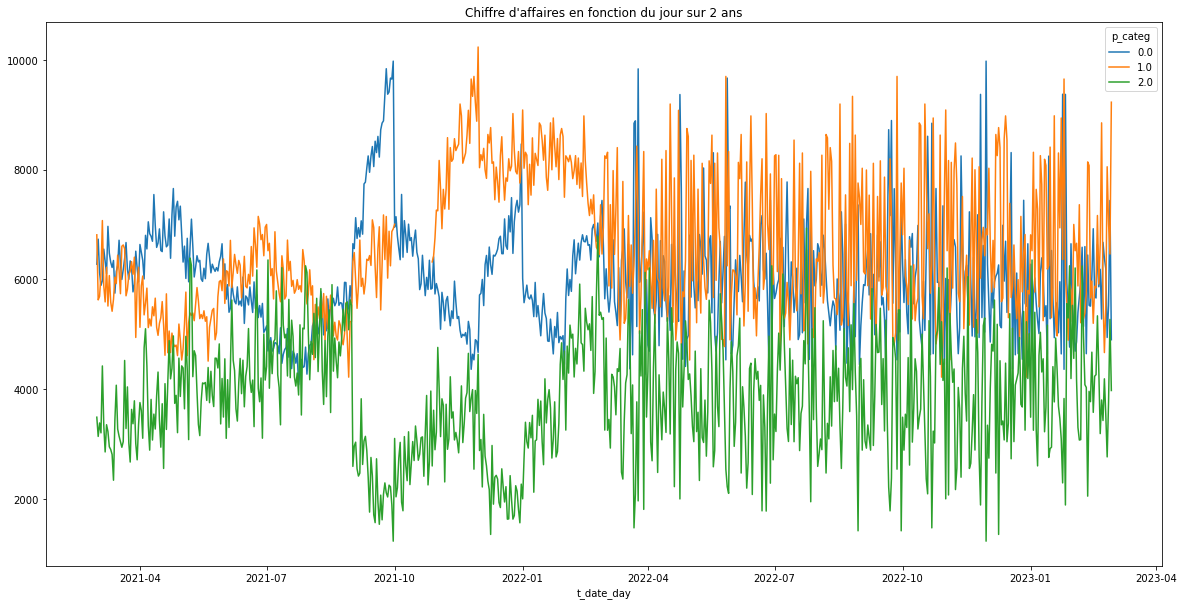

In [38]:
# Visualisons l'évolution du CA par jour sur 2 ans
transac_prod_cust_jour_pivot.reset_index().plot(x="t_date_day", y="p_price", figsize=(20,10))
plt.title("Chiffre d'affaires en fonction du jour sur 2 ans")
plt.show()

In [39]:
# Filtrons notre dataframe sur la 't_date_day et 'p_price'
transac_prod_cust['annee_mois'] =pd.to_datetime(transac_prod_cust['t_date_day'])

In [40]:
# Convertissons les dates en mois
transac_prod_cust['annee_mois'] = transac_prod_cust['annee_mois'].dt.to_period('M')

In [41]:
# Appliquons la fonction 'pivot_table' pour agréger les prix sur la période correspondante
transac_prod_cust_mois_pivot = pd.pivot_table(transac_prod_cust, index=['annee_mois'], columns=['p_categ'], values=['p_price'], aggfunc='sum')

In [42]:
# Affichons le résultat retourné
transac_prod_cust_mois_pivot.head()

p_price                      
p_categ           0.0        1.0        2.0
annee_mois                                 
2021-03     193629.17  186974.17  101837.27
2021-04     205222.46  156138.35  114748.49
2021-05     196186.72  165893.40  130863.35
2021-06     167943.15  189162.04  126983.37
2021-07     144750.79  188523.27  149561.34

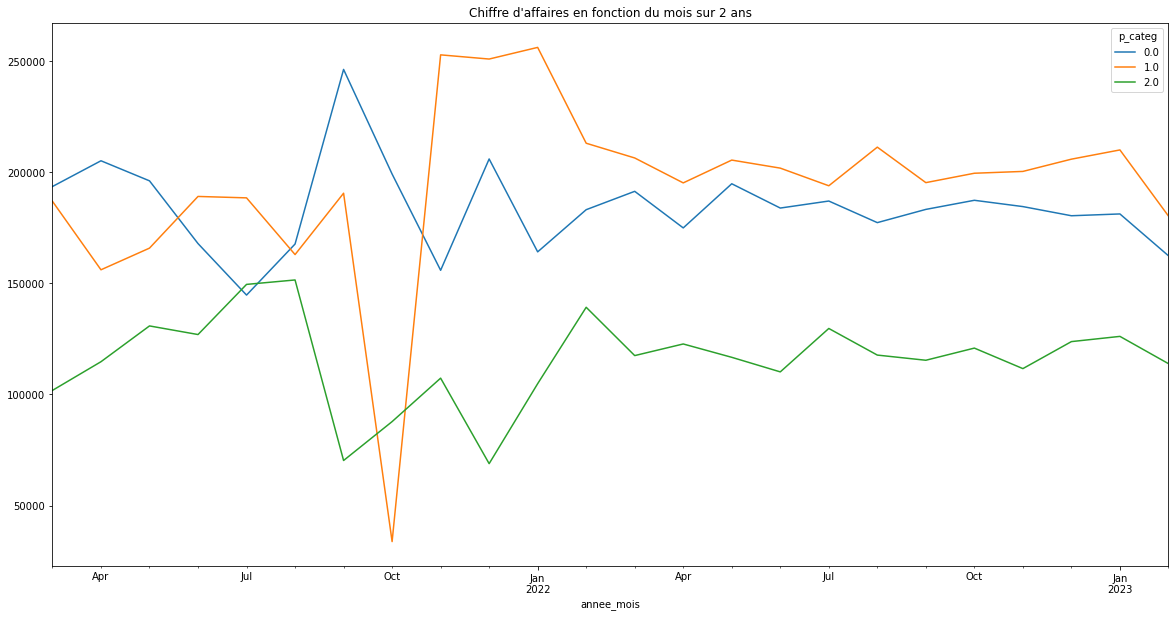

In [43]:
# Visualisons l'évolution du CA par mois sur 2 ans
transac_prod_cust_mois_pivot.reset_index().plot(x="annee_mois", y="p_price", figsize=(20,10))
plt.title("Chiffre d'affaires en fonction du mois sur 2 ans")
plt.show()

On observe une baisse du chiffre d'affaires au mois d'octobre 2021 peut-être à cause d'une rupture de commande ou d'une rupture de stock

In [44]:
# Filtrons rien que les données du mois d'octobre
transac_prod_cust_jour_pivot1 = transac_prod_cust_jour_pivot.reset_index()

In [45]:
# Filtrons rien que les données du mois d'octobre
transac_prod_cust_jour_pivot1[(transac_prod_cust_jour_pivot1['t_date_day']>datetime.date(2021,10,1))& (transac_prod_cust_jour_pivot1['t_date_day']<datetime.date(2021,10,31))]

t_date_day  p_price                  
p_categ                  0.0      1.0      2.0
215      2021-10-02  7141.01      NaN  2041.12
216      2021-10-03  6786.57      NaN  2206.48
217      2021-10-04  6561.58      NaN  2746.08
218      2021-10-05  6357.91      NaN  3032.55
219      2021-10-06  7546.58      NaN  1944.11
220      2021-10-07  6404.01      NaN  1787.07
221      2021-10-08  7069.53      NaN  3137.82
222      2021-10-09  6808.69      NaN  2616.67
223      2021-10-10  6490.98      NaN  2334.67
224      2021-10-11  7005.40      NaN  3225.16
225      2021-10-12  6706.97      NaN  2264.18
226      2021-10-13  6760.40      NaN  2666.82
227      2021-10-14  6422.39      NaN  3047.39
228      2021-10-15  6711.07      NaN  2701.75
229      2021-10-16  6898.14      NaN  3330.88
230      2021-10-17  6492.60      NaN  3065.38
231      2021-10-18  6376.43      NaN  2707.29
232      2021-10-19  5813.69      NaN  2816.00
233      2021-10-20  5916.76      NaN  3118.42
234      2021-10-21  6438.85      NaN  3132.94
235      2021-10-22  6051.86      NaN  2416.00
236      2021-10-23  5704.26      NaN  3206.38
237      2021-10-24  6036.65      NaN  3886.54
238      2021-10-25  5817.82      NaN  2258.22
239      2021-10-26  6349.00      NaN  2685.78
240      2021-10-27  5822.24      NaN  3967.29
241      2021-10-28  5837.61  6317.99  2602.82
242      2021-10-29  6410.57  6425.18  3617.88
243      2021-10-30  5734.62  6753.69  2898.47

In [46]:
# Filtrons rien que les données du mois d'octobre
transac_prod_cust_jour_pivot1_oct = transac_prod_cust_jour_pivot1[(transac_prod_cust_jour_pivot1['t_date_day']>datetime.date(2021,10,1))& (transac_prod_cust_jour_pivot1['t_date_day']<datetime.date(2021,10,31))]
transac_prod_cust_jour_pivot1_oct

t_date_day  p_price                  
p_categ                  0.0      1.0      2.0
215      2021-10-02  7141.01      NaN  2041.12
216      2021-10-03  6786.57      NaN  2206.48
217      2021-10-04  6561.58      NaN  2746.08
218      2021-10-05  6357.91      NaN  3032.55
219      2021-10-06  7546.58      NaN  1944.11
220      2021-10-07  6404.01      NaN  1787.07
221      2021-10-08  7069.53      NaN  3137.82
222      2021-10-09  6808.69      NaN  2616.67
223      2021-10-10  6490.98      NaN  2334.67
224      2021-10-11  7005.40      NaN  3225.16
225      2021-10-12  6706.97      NaN  2264.18
226      2021-10-13  6760.40      NaN  2666.82
227      2021-10-14  6422.39      NaN  3047.39
228      2021-10-15  6711.07      NaN  2701.75
229      2021-10-16  6898.14      NaN  3330.88
230      2021-10-17  6492.60      NaN  3065.38
231      2021-10-18  6376.43      NaN  2707.29
232      2021-10-19  5813.69      NaN  2816.00
233      2021-10-20  5916.76      NaN  3118.42
234      2021-10-21  6438.85      NaN  3132.94
235      2021-10-22  6051.86      NaN  2416.00
236      2021-10-23  5704.26      NaN  3206.38
237      2021-10-24  6036.65      NaN  3886.54
238      2021-10-25  5817.82      NaN  2258.22
239      2021-10-26  6349.00      NaN  2685.78
240      2021-10-27  5822.24      NaN  3967.29
241      2021-10-28  5837.61  6317.99  2602.82
242      2021-10-29  6410.57  6425.18  3617.88
243      2021-10-30  5734.62  6753.69  2898.47

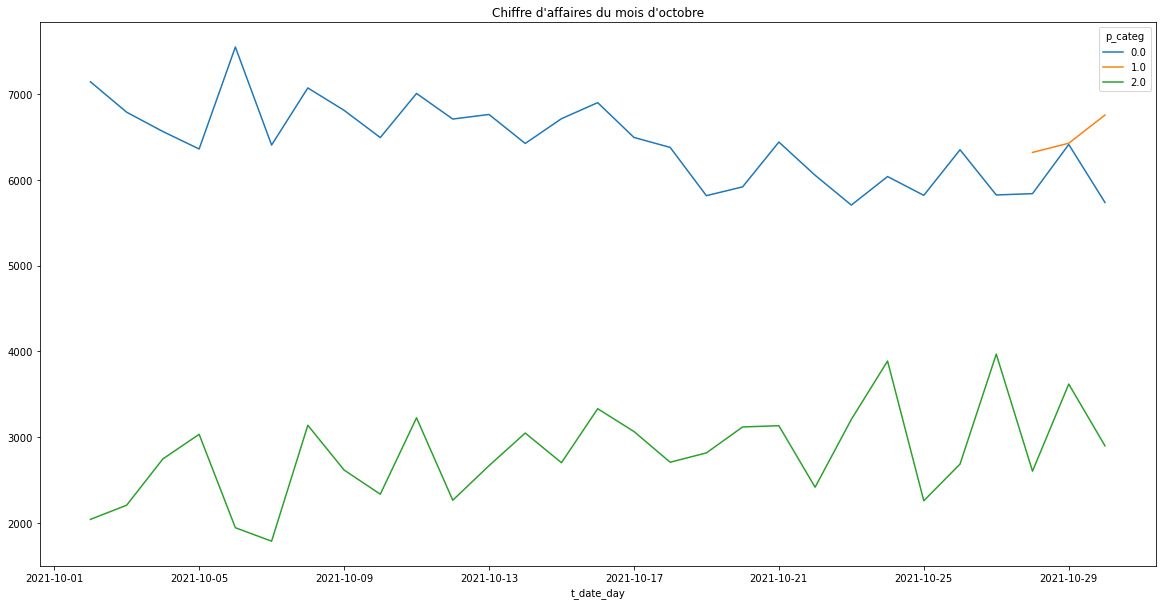

In [47]:
# Visualisons l'évolution du CA par jour pour le mois d'octobre
transac_prod_cust_jour_pivot1_oct.plot(x="t_date_day", y="p_price", figsize=(20,10))
plt.title("Chiffre d'affaires du mois d'octobre")
plt.show()

- On observe bien évidemment une baisse du CA sur le mois d'octobre
- Les livres de catégorie 1 n'ont pas été vendus du 02 au 27 octobre 
- Est-ce  à cause rupture de stock/ rupture de commande ou des données de la période non renseignées dans le progiciel ?

### II. Moyennes mobiles

#### II.1 Détermination des moyennes mobiles

In [48]:
# Re-crééons une nouvelle variable sans 'la catégorie' afin d'éviter le message d'erreur (Wrong number of items passed 3)
transac_prod_cust_jour_pivot_ma = pd.pivot_table(transac_prod_cust_short,  index=['t_date_day'], values=['p_price'], aggfunc='sum')

In [49]:
# Moyennes mobiles sur 7 jours
transac_prod_cust_jour_pivot_ma['MA 7'] = transac_prod_cust_jour_pivot_ma['p_price'].rolling(7).mean()

# Moyennes mobiles sur 30 jours
transac_prod_cust_jour_pivot_ma['MA 30'] = transac_prod_cust_jour_pivot_ma['p_price'].rolling(30).mean()

# Moyennes mobiles sur 90 jours
transac_prod_cust_jour_pivot_ma['MA 90'] = transac_prod_cust_jour_pivot_ma['p_price'].rolling(90).mean()

#### II.2 Visualisons des séries

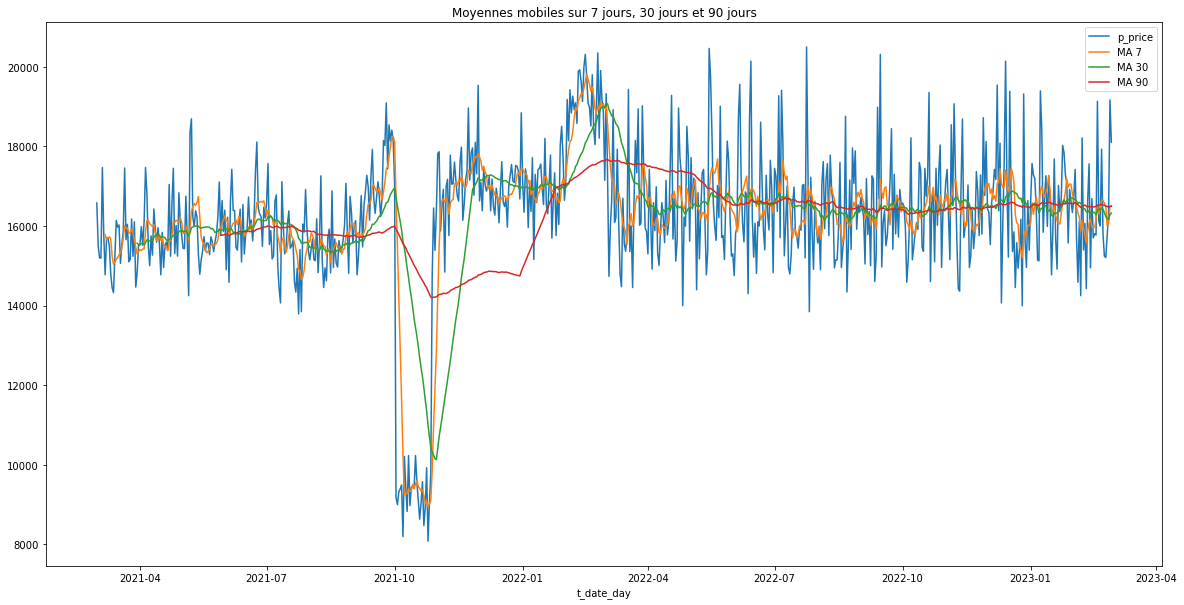

In [50]:
# Variables qu'on veut representer

vars = ['p_price', 'MA 7', 'MA 30', 'MA 90']

# Graphique

transac_prod_cust_jour_pivot_ma[vars].plot(figsize=(20,10))
plt.title("Moyennes mobiles sur 7 jours, 30 jours et 90 jours")
plt.show()

- Les courbes sont constantes
- Pas de tendance qui se dégage
- Pas des mois où les ventes sont les plus importantes

#### I.1.3 Tops et flops

In [51]:
# Trions les références ayant les ventes les plus élevées 
transac_prod_cust3.groupby(['p_id_prod'])['p_price'].sum().sort_values(ascending=False).head(10)

p_id_prod
2_159    94893.50
2_135    69334.95
2_112    65407.76
2_102    60736.78
2_209    56971.86
1_395    54356.25
1_369    54025.48
2_110    53846.25
2_39     53060.85
2_166    52449.12
Name: p_price, dtype: float64

Les 10 livres les plus vendus sont principalement de catégorie 2

In [52]:
# Trions les références ayant les ventes les plus élevées 
transac_prod_cust3.groupby(['p_id_prod'])['p_price'].sum().sort_values().head(10)

p_id_prod
0_1539    0.99
0_1284    1.38
0_1653    1.98
0_541     1.99
0_807     1.99
0_1601    1.99
0_1728    2.27
0_1498    2.48
0_898     2.54
0_1840    2.56
Name: p_price, dtype: float64

Les 10 livres les moins vendus sont de catégorie 0

### III. Profil des clients

Pour enrichir l'analyse, on crée quelques variables additionnelles, comme :

- le nombre de produits achetés par client chaque mois (la fréquence d'achats)
- le nombre de ventes total par client sur l'année entière
- le panier moyen,
- la taille du panier moyen pour chaque client
- le chiffre d'affaires total par client sur l'année

In [53]:
# Tranches d'âge
transac_prod_cust3['classe_age'] = '18-30'
transac_prod_cust3['classe_age'].loc[transac_prod_cust3[transac_prod_cust3['c_age']>=30].index] = '30-50'
transac_prod_cust3['classe_age'].loc[transac_prod_cust3[transac_prod_cust3['c_age']>=50].index] = '50-70'
transac_prod_cust3['classe_age'].loc[transac_prod_cust3[transac_prod_cust3['c_age']>=70].index] = '70 et +'

 
transac_prod_cust3 = transac_prod_cust3.merge(transac_prod_cust3.groupby('c_client_id').count()
['t_date_day'].reset_index().rename(columns={'t_date_day': 'total_ventes'}),
    how='left', on='c_client_id')
    
transac_prod_cust3['ventes_mensuelles'] = round(transac_prod_cust3['total_ventes'] / 12)

transac_prod_cust3 = transac_prod_cust3.merge(
    transac_prod_cust3.pivot_table(
        index=['c_client_id','t_date_day'], 
        values='p_price').reset_index().pivot_table(
        index='c_client_id').reset_index().rename(
        columns={'p_price': 'panier_moyen'}), 
    on='c_client_id', how='left')

transac_prod_cust3 = transac_prod_cust3.merge(
    transac_prod_cust3.pivot_table(
        index=['c_client_id','t_date_day'], 
        values='p_price', 
        aggfunc='count').reset_index().pivot_table(
        index='c_client_id').reset_index().rename(
        columns={'p_price': 'taille_panier_moyen'}), 
    on='c_client_id', how='left')

transac_prod_cust3 = transac_prod_cust3.merge(
    transac_prod_cust3.pivot_table(
    index='c_client_id', values='p_price', 
    aggfunc='sum').reset_index().rename(
    columns={'p_price': 'total_achats'}),
    on='c_client_id', how='left')


C:\Users\moust\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [54]:
# Affichons le dataframe plus les nouveaux éléments
transac_prod_cust3

,p_id_prod,t_session_id,c_client_id,p_price,p_categ,c_sex,c_birth,c_age,t_date_day,annee_mois,year,month,day_name,classe_age,total_ventes,ventes_mensuelles,panier_moyen,taille_panier_moyen,total_achats
0,0_1518,s_211425,c_103,4.18,0.0,f,1986,36,2022-05-20,2022-05,2022,5,Friday,30-50,195,16.0,11.971467,2.500000,2288.49
1,1_251,s_158752,c_8534,15.99,1.0,m,1988,34,2022-02-02,2022-02,2022,2,Wednesday,30-50,247,21.0,13.495878,2.330189,3498.14
2,0_1277,s_225667,c_6714,7.99,0.0,f,1968,54,2022-06-18,2022-06,2022,6,Saturday,50-70,9187,766.0,16.685682,13.031206,153682.86
3,2_209,s_52962,c_6941,69.99,2.0,m,2000,22,2021-06-24,2021-06,2021,6,Thursday,18-30,17,1.0,48.083846,1.307692,886.50
4,0_1509,s_325227,c_4232,4.99,0.0,m,1980,42,2023-01-11,2023-01,2023,1,Wednesday,30-50,168,14.0,13.579737,2.210526,2381.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679327,0_1551,s_150195,c_8489,12.99,0.0,f,1951,71,2022-01-15,2022-01,2022,1,Saturday,70 et +,73,6.0,15.018774,1.377358,1088.84
679328,1_639,s_181434,c_4370,10.99,1.0,f,1977,45,2022-03-19,2022-03,2022,3,Saturday,30-50,84,7.0,13.100398,3.818182,1186.77
679329,0_1425,s_314704,c_304,12.99,0.0,f,1988,34,2022-12-20,2022-12,2022,12,Tuesday,30-50,117,10.0,14.909033,2.387755,1692.89
679330,0_1994,s_63204,c_2227,4.98,0.0,m,1986,36,2021-07-16,2021-07,2021,7,Friday,30-50,234,20.0,13.244575,2.629213,3056.29


#### III.1 Genre

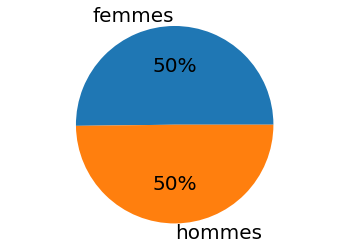

<Figure size 3600x3600 with 0 Axes>

In [55]:
# Construisons un diagramme en camenbert 
plt.pie(transac_prod_cust3.c_sex.value_counts(), autopct=lambda x:f'{x:.0f}%',labels=['femmes', 'hommes'], 
        textprops={'fontsize': 20})

plt.axis('equal')
plt.figure(figsize=(50,50))
plt.show()

#### III.2  Pyramide des âges par sexe

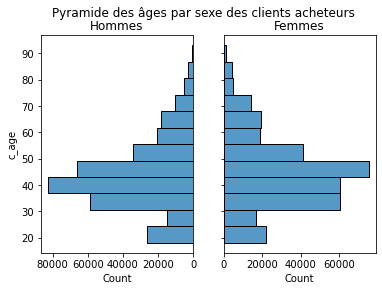

In [56]:
# Affichons le âges des clients par sexe sur une pyramide des âges
fig, axes = plt.subplots(1, 2)
fig.suptitle('Pyramide des âges par sexe des clients acheteurs')

sns.histplot(ax=axes[0], y=transac_prod_cust3[transac_prod_cust3['c_sex']=='m']['c_age'], bins=12)
axes[0].invert_xaxis()
axes[0].set_title('Hommes')

sns.histplot(ax=axes[1], y=transac_prod_cust3[transac_prod_cust3['c_sex']=='f']['c_age'], bins=12)
axes[1].set_yticklabels([])
axes[1].set_ylabel('')
axes[1].set_title('Femmes')

plt.show()

- La pyramide des âges ne montre pas de grande  différence entre les hommes et les femmes
- On obserbe une forte concentration entre les 30 et 50 ans
- On obserbe des comportements d'achats quasiment semblables des [18-30],[30-50],[50-70],[70 et +]

#### III.3 Contribution au CA par classes d'âge

Text(0.5, 1.0, 'Contribution au CA')

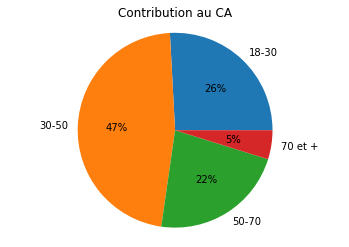

In [57]:
# Construisons un diagramme en camenbert
df=transac_prod_cust3[['classe_age', 'p_price']].groupby('classe_age').sum().reset_index()
plt.pie(df.p_price, autopct='%1.0f%%', labels=df.classe_age)
plt.axis('equal')
plt.title('Contribution au CA')

Les 30-50 ans représentent près de la moitié des ventes de la librairie

 #### III.4  Volume des transactions par âge et catégorie

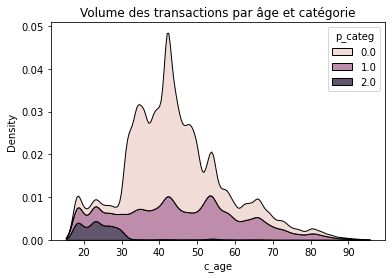

In [59]:
sns.kdeplot(data=transac_prod_cust3, x='c_age', hue='p_categ', multiple="stack")
plt.title('Volume des transactions par âge et catégorie')
plt.show()

- Les 3 catégories sont consommées par toutes les classes d'âge
- La catégorie 2 est consommée quasi exclusivement par les moins de 35 ans
- Les acheteurs de la catégorie 0 sont principalement ces 30-50 ans

 #### III.5  Distribution des CA par classes d'âge

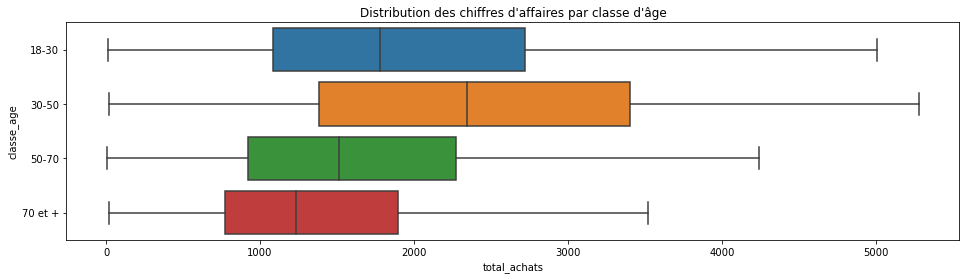

In [60]:
# construisons notre boite à moustaches
plt.figure(figsize=(16,4))
sns.boxplot(data=transac_prod_cust3.sort_values(by='classe_age'), 
            y='classe_age', x='total_achats', 
            showfliers=False, showmeans=False)
plt.title('Distribution des chiffres d\'affaires par classe d\'âge')
plt.show()

- Les 30-50 ans concentrent les plus gros chiffres d'affaires
- Suivi par les moins de 30 ans

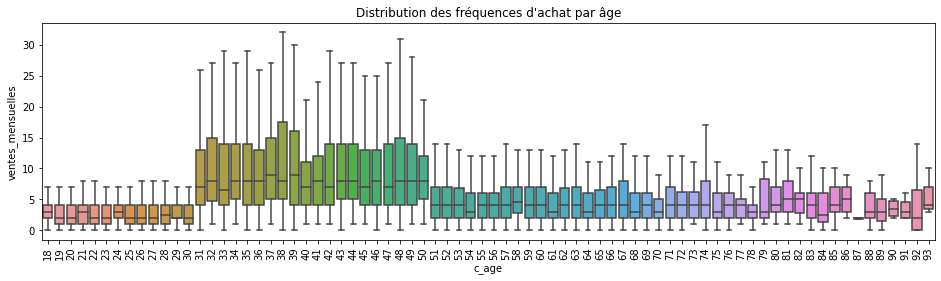

In [61]:
#  construisons notre boite à moustaches 
plt.figure(figsize=(16,4))
sns.boxplot(
    data=transac_prod_cust3.pivot_table(index=['c_client_id']),
    y='ventes_mensuelles', x='c_age', showfliers=False)
plt.xticks(rotation=90)
plt.title('Distribution des fréquences d\'achat par âge')
plt.show()

La fréquence d'achats (le nombre de livres par mois) classe d'autant mieux les 3 groupes d'individus définis plus tôt :

- les moins de 30 ans achètent le même nombre de livrees (jamais plus de 3 livres par mois)
- les 30-50 ans se démarquent : un quart de ces clients achète plus de 8 livres par mois.
- les plus de 50 ans ont des habitudes plus variées, mais achètent rarement plus de 5 livres

 #### III.6  Deux types de clients (hypothèses)

In [62]:
ca_annuel = transac_prod_cust3.pivot_table(
    index='c_client_id', values=[
        'total_achats','ventes_mensuelles','total_ventes','panier_moyen']
    ).sort_values(by='total_achats', ascending=False).reset_index()

ca_annuel.head(10) # Les 10 clients aux plus gros chiffres d'affaires annuels

,c_client_id,panier_moyen,total_achats,total_ventes,ventes_mensuelles
0,c_1609,12.698451,324033.35,25488,2124.0
1,c_4958,56.004691,289760.34,5195,433.0
2,c_6714,16.685682,153682.86,9187,766.0
3,c_3454,16.494643,113679.90,6773,564.0
4,c_3263,13.226564,5276.87,403,34.0
5,c_1570,14.795369,5271.62,369,31.0
6,c_2899,55.754703,5214.05,105,9.0
7,c_2140,12.595187,5208.82,402,34.0
8,c_7319,13.434349,5155.77,371,31.0
9,c_8026,13.702672,5096.57,377,31.0


En triant les clients par chiffre d'affaires annuel, 4 clients se détachent. Leur nombre d'achats est anormalement plus élevé que celui des autres clients : on a sûrement affaire à des clients professionels (simple hypothèse)

In [63]:
# Supposons qu'il y ait deux types de clients des profesionnels et des particuliers
# Création d'une variable 'Type' de client (2 modalités : particulier ou professionnel)
transac_prod_cust3['c_client_type'] = 'B2C'
transac_prod_cust3['c_client_type'].loc[transac_prod_cust3[transac_prod_cust3['c_client_id'].isin(ca_annuel.head(4)['c_client_id'])].index] = 'B2B'

# Création de 2 dataframes
b2b = transac_prod_cust3[transac_prod_cust3['c_client_type']=='B2B']
b2c = transac_prod_cust3[transac_prod_cust3['c_client_type']=='B2C']

transac_prod_cust3

C:\Users\moust\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,p_id_prod,t_session_id,c_client_id,p_price,p_categ,c_sex,c_birth,c_age,t_date_day,annee_mois,year,month,day_name,classe_age,total_ventes,ventes_mensuelles,panier_moyen,taille_panier_moyen,total_achats,c_client_type
0,0_1518,s_211425,c_103,4.18,0.0,f,1986,36,2022-05-20,2022-05,2022,5,Friday,30-50,195,16.0,11.971467,2.500000,2288.49,B2C
1,1_251,s_158752,c_8534,15.99,1.0,m,1988,34,2022-02-02,2022-02,2022,2,Wednesday,30-50,247,21.0,13.495878,2.330189,3498.14,B2C
2,0_1277,s_225667,c_6714,7.99,0.0,f,1968,54,2022-06-18,2022-06,2022,6,Saturday,50-70,9187,766.0,16.685682,13.031206,153682.86,B2B
3,2_209,s_52962,c_6941,69.99,2.0,m,2000,22,2021-06-24,2021-06,2021,6,Thursday,18-30,17,1.0,48.083846,1.307692,886.50,B2C
4,0_1509,s_325227,c_4232,4.99,0.0,m,1980,42,2023-01-11,2023-01,2023,1,Wednesday,30-50,168,14.0,13.579737,2.210526,2381.56,B2C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679327,0_1551,s_150195,c_8489,12.99,0.0,f,1951,71,2022-01-15,2022-01,2022,1,Saturday,70 et +,73,6.0,15.018774,1.377358,1088.84,B2C
679328,1_639,s_181434,c_4370,10.99,1.0,f,1977,45,2022-03-19,2022-03,2022,3,Saturday,30-50,84,7.0,13.100398,3.818182,1186.77,B2C
679329,0_1425,s_314704,c_304,12.99,0.0,f,1988,34,2022-12-20,2022-12,2022,12,Tuesday,30-50,117,10.0,14.909033,2.387755,1692.89,B2C
679330,0_1994,s_63204,c_2227,4.98,0.0,m,1986,36,2021-07-16,2021-07,2021,7,Friday,30-50,234,20.0,13.244575,2.629213,3056.29,B2C


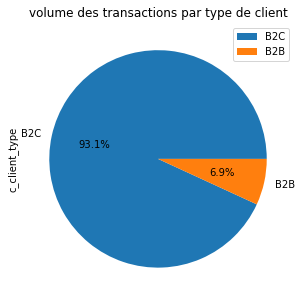

In [64]:
# Proportion des transactions entre professionnels et particuliers
plt.figure(figsize=(5,5))
transac_prod_cust3['c_client_type'].value_counts(normalize=True).plot(
    kind='pie',
    legend=True,
    autopct='%1.1f%%')
plt.title('volume des transactions par type de client')
plt.show()

- Les professionnels représentent 6.9% des transactions, Ce sont probablement des **libraires/bibliothèques** qui achètent en gros
- Les particuliers représentent 93.10 % des transactions

 #### III.7  Repartition du chiffre d'affaires entre les clients par la courbe de lorenz

La courbe de Lorenz :
- Mesure la concentration
- Très utilisée pour mésurer les inégalités
- Echelle 
   * Abscisses : % cumulés des effectifs
   * Ordonnées : % cumulés du caractère
  
Vocabulaire :
- Diagonale : droite d'équirépartition
- Courbe tracée : courbe de lorenz

Interprétation :
- Plus la courbe est proche de la diagonale, plus la répartition est égale
- Plus la courbe est loin de la diagonale, moins la répartition est égale

Indice de Gini :
- coef de gini [0;1]
- coef de gini = 0 La répartition est égale
- coef de gini = 1 La répartition est inégale


Indice de Gini : 0.44639886626750536


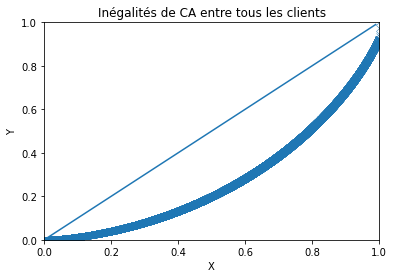

In [65]:
# Courbe de Lorenz
def lorenz(variable, title):
    X = variable.values
    X = np.sort(X)
    
    # Indice de Gini
    def gini(array):
        array
        sorted_array = array.copy()
        sorted_array.sort()
        n = array.size
        coef_ = 2. / n
        const_ = (n + 1.) / n
        weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_array)])
        return coef_*weighted_sum/(sorted_array.sum()) - const_
    print('Indice de Gini :', gini(X))
    
    # Courbe de Lorenz
    X_lorenz = X.cumsum() / X.sum()
    X_lorenz = np.insert(X_lorenz, 0, 0)
    # X_lorenz[0], X_lorenz[-1]
    y = np.arange(X_lorenz.size)/(X_lorenz.size-1)
    lorenz = pd.DataFrame()
    lorenz['Y'] = pd.Series(X_lorenz)
    lorenz['X'] = pd.Series(y)
    sns.scatterplot(data=lorenz, x='X', y='Y', marker='x')

    # Diagonale
    a = np.arange(0,1,.01)
    x = a
    y = a
    
    # Graphique
    sns.lineplot(x=x,y=y)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.title(title)
    plt.show()
    
# Inégalité des chiffres d'affaires annuels de tous les clients
lorenz(ca_annuel['total_achats'], 'Inégalités de CA entre tous les clients')

- X represente la part cumulée du chiffre d'affaires (en %)
- Y represente la part cummulée des clients (en %)
- L'indice de gini = 0,44, il est compris entre 0 et 1
- si l'on projette sur la courbe : 44 % des clients ont réalisés 75 % du chiffre d'affraires
- La répartition est inégalitaire 

### IV. Conversion des dataframes en csv 

In [66]:
# convertissons le dataframe en csv
transac_prod_cust3.to_csv('transac_prod_cust3_DJ.csv',index=False)

In [67]:
# convertissons le dataframe en csv
b2b.to_csv('b2b_DJ.csv',index=False)

In [68]:
# convertissons le dataframe en csv
b2c.to_csv('b2c_DJ.csv',index=False)